## Import libraries and data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# define path
path = '/Users/Cel/Documents/Data Analytics/6. Maine Fisheries Landings'

In [4]:
# import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'landings_clean.csv'), index_col = False)

In [5]:
lobster = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'lobster_clean.csv'), index_col = False)

In [6]:
lobster.head(10)

Unnamed: 0  year           species             port      county  \
0         182  2008  Lobster American          Addison  Washington   
1         183  2008  Lobster American    Bailey Island  Cumberland   
2         184  2008  Lobster American       Bar Harbor     Hancock   
3         185  2008  Lobster American      Bass Harbor     Hancock   
4         186  2008  Lobster American            Beals  Washington   
5         187  2008  Lobster American     Birch Harbor     Hancock   
6         188  2008  Lobster American        Blue Hill     Hancock   
7         189  2008  Lobster American  Boothbay Harbor     Lincoln   
8         190  2008  Lobster American           Bremen     Lincoln   
9         191  2008  Lobster American      Brooksville     Hancock   

   weight_type      weight        value  number_harvesters  price_per_lb  
0  Live Pounds   874072.35  2811848.728                 80      3.216952  
1  Live Pounds  1300961.05  4380685.491                100      3.367269  
2  Live Pounds   749213.48  2761140.098                 71      3.685385  
3  Live Pounds   860515.00  3237508.820                 89      3.762292  
4  Live Pounds  1463538.05  4777283.831                173      3.264202  
5  Live Pounds   469693.50  1686542.550                 20      3.590730  
6  Live Pounds   501952.97  1871689.247                 58      3.728814  
7  Live Pounds  1167021.10  4076446.840                144      3.493036  
8  Live Pounds   714036.20  2313529.645                 67      3.240073  
9  Live Pounds    16853.20    66952.768                  9      3.972704

In [7]:
# remove qualitative ata
lobster_quan = lobster.drop(columns = ['Unnamed: 0','species','port','county','weight_type'])

In [8]:
lobster_quan

year      weight         value  number_harvesters  price_per_lb
0     2008   874072.35  2.811849e+06                 80      3.216952
1     2008  1300961.05  4.380685e+06                100      3.367269
2     2008   749213.48  2.761140e+06                 71      3.685385
3     2008   860515.00  3.237509e+06                 89      3.762292
4     2008  1463538.05  4.777284e+06                173      3.264202
...    ...         ...           ...                ...           ...
1109  2022   223031.45  9.568708e+05                 17      4.290295
1110  2022  6960663.70  3.023618e+07                188      4.343864
1111  2022    24907.00  1.156994e+05                  6      4.645256
1112  2022  1818154.05  6.541451e+06                 57      3.597853
1113  2022   940215.45  4.266021e+06                 25      4.537280

[1114 rows x 5 columns]

In [9]:
# standardize data
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(lobster_quan)

## Elbow technique

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
score = [kmeans[i].fit(lobster_quan).score(lobster_quan) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/Cel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Cel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Cel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Cel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'au

[-9.882220767342059e+16,
 -3.071043887790315e+16,
 -1.4969721905780234e+16,
 -9170969673920474.0,
 -6273049033009566.0,
 -4346593981613222.0,
 -3234688316227712.0,
 -2598979306704783.0,
 -2048464660007385.0]

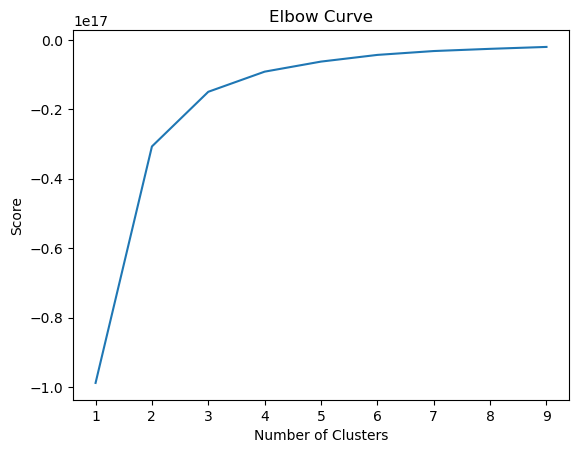

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Optimal amount of clusters is 3.

## k-means clustering

In [13]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [14]:
# Fit the k-means object to the data.

kmeans.fit(lobster_quan)

/Users/Cel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [15]:
lobster_quan['clusters'] = kmeans.fit_predict(lobster_quan)

/Users/Cel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
lobster_quan.head()

year      weight        value  number_harvesters  price_per_lb  clusters
0  2008   874072.35  2811848.728                 80      3.216952         0
1  2008  1300961.05  4380685.491                100      3.367269         0
2  2008   749213.48  2761140.098                 71      3.685385         0
3  2008   860515.00  3237508.820                 89      3.762292         0
4  2008  1463538.05  4777283.831                173      3.264202         0

In [17]:
lobster_quan['clusters'].value_counts()

clusters
0    810
2    264
1     40
Name: count, dtype: int64

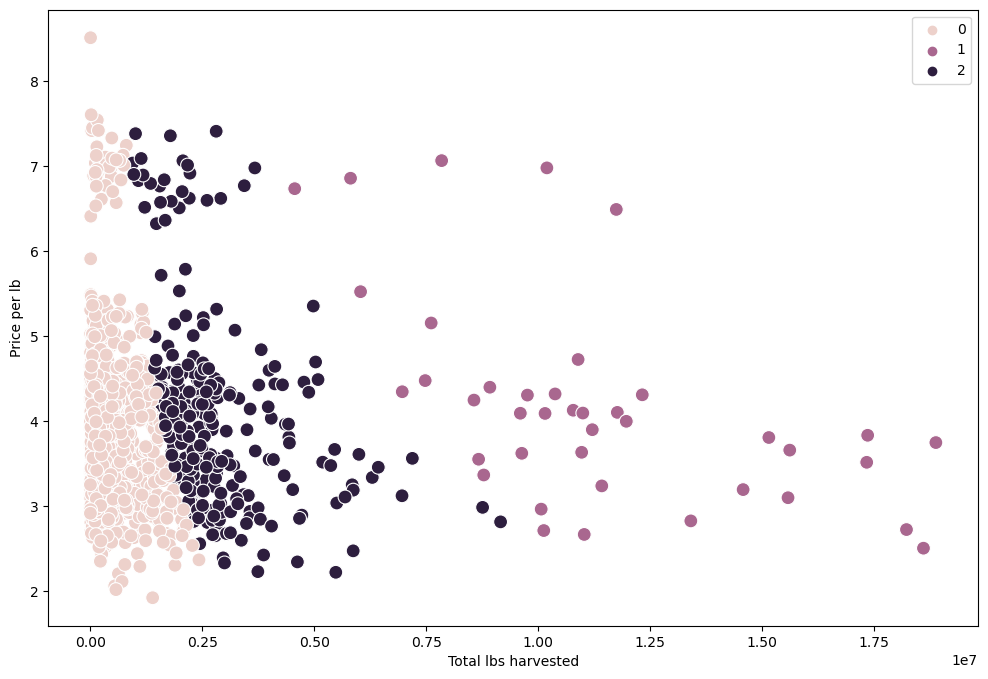

In [27]:
# Plot the clusters for the "weight" and "price per lb" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=lobster_quan['weight'], y=lobster_quan['price_per_lb'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total lbs harvested') # Label x-axis.
plt.ylabel('Price per lb') # Label y-axis.
plt.show()

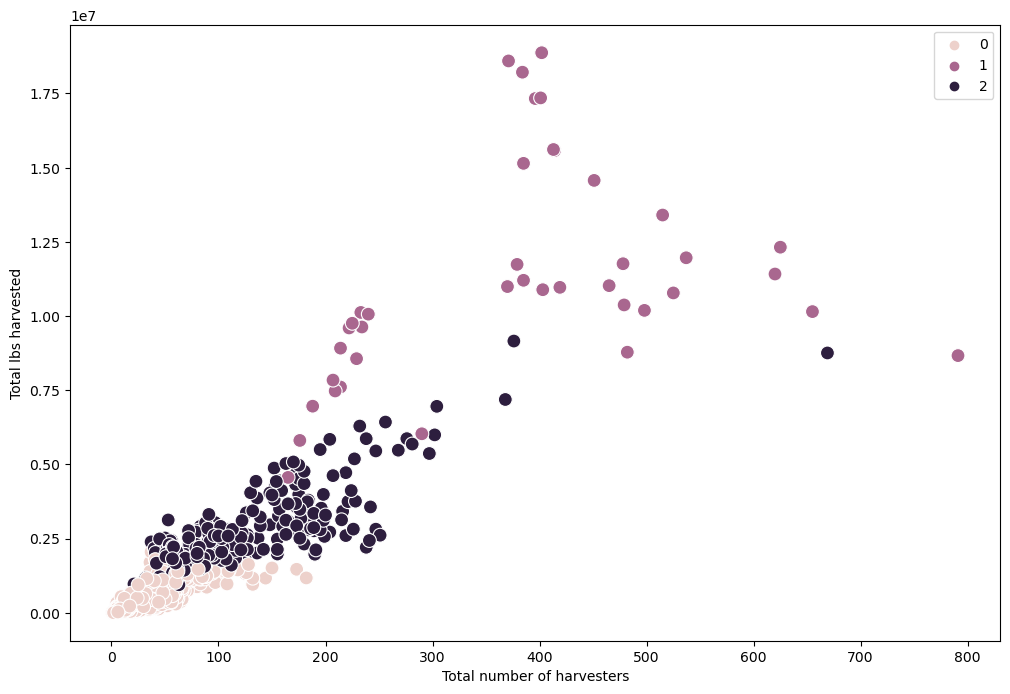

In [26]:
# Plot the clusters for the "number_harvesters" and "weight" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=lobster_quan['number_harvesters'], y=lobster_quan['weight'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total number of harvesters') # Label x-axis.
plt.ylabel('Total lbs harvested') # Label y-axis.
plt.show()

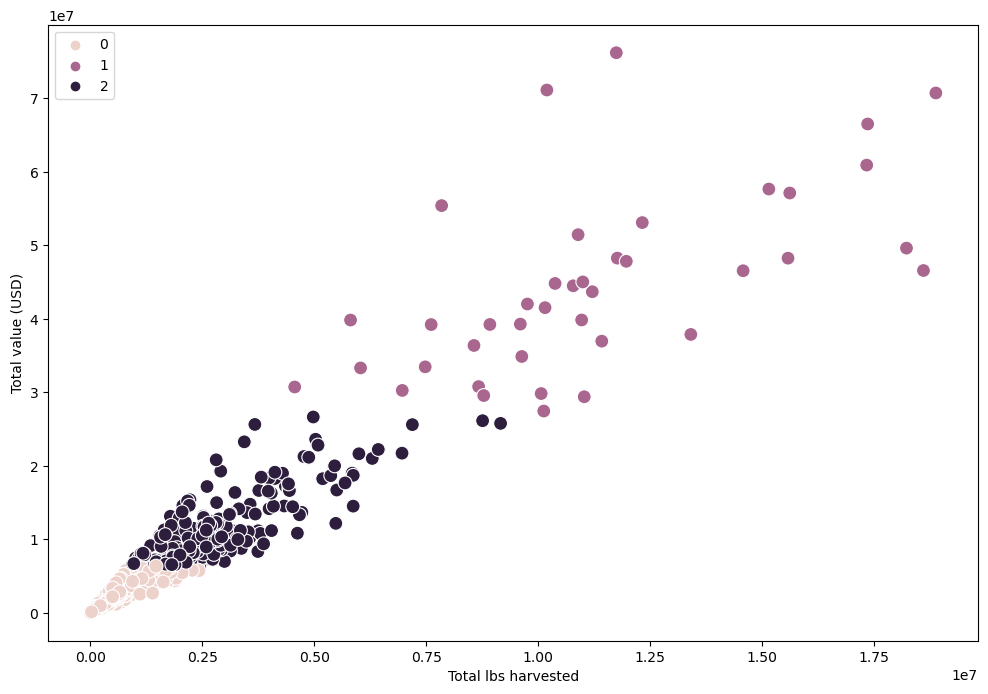

In [25]:
# Plot the clusters for the "weight" and "value" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=lobster_quan['weight'], y=lobster_quan['value'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total lbs harvested') # Label x-axis.
plt.ylabel('Total value (USD)') # Label y-axis.
plt.show()

The clusters seem to make the most sense in the third plot (total lbs harvested vs total value). The pink cluster represents the majority of catches, which are relatively low in weight and in value. The next two clusters increase in value and weight (the third being the highest in value and weight, but least numerous). The first graph plotting weight vs price per pound tells us that the amount of lobster harvested doesn't really affect the value - which goes against our original hypothesis. 

In [19]:
# new column to categorize clusters by color
lobster_quan.loc[lobster_quan['clusters'] == 2, 'cluster'] = 'dark purple'
lobster_quan.loc[lobster_quan['clusters'] == 1, 'cluster'] = 'purple'
lobster_quan.loc[lobster_quan['clusters'] == 0, 'cluster'] = 'pink'

In [28]:
# summary statistics by cluster
lobster_quan.groupby('cluster').agg({'year':['count','mean', 'median'], 
                    'weight':['mean', 'median'], 
                    'value':['mean', 'median'],
                    'number_harvesters':['mean', 'median'],
                    'price_per_lb': ['mean', 'median']})

year                             weight                \
            count         mean  median          mean        median   
cluster                                                              
dark purple   264  2015.840909  2016.0  2.784164e+06  2.492588e+06   
pink          810  2014.443210  2014.0  5.327532e+05  3.562763e+05   
purple         40  2016.375000  2016.5  1.126904e+07  1.083102e+07   

                    value               number_harvesters        price_per_lb  \
                     mean        median              mean median         mean   
cluster                                                                         
dark purple  1.084980e+07  9.425142e+06        125.776515  107.0     4.086746   
pink         1.987159e+06  1.358773e+06         32.414815   24.0     3.936077   
purple       4.465009e+07  4.282334e+07        382.225000  390.5     4.173289   

                       
               median  
cluster                
dark purple  3.957571  
pink         3.831854  
purple       4.042298

The original hypothesis was that price per pound would decrease as the total weight harvested increases. The regression analysis from the previous exercise suggested that the negative linear relationship was quite weak. These summary statistics suggest a stronger linear relationship exists between weight and value, which is to be expected. The purple group has the largest mean weight, largest mean value, and largest amount of harvesters. The price per pound between all three groups is relatively consistent (though is does show signs of linearity, the statistical significance should be tested.) Perhaps a better way of exploring the original hypothesis with clusters would be to plot the changes in price per pound over one season (rather than cumulatively over many years). 